<a href="https://colab.research.google.com/github/KSaiBharadwaj/fraudanalytics/blob/main/DSO562_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial RFM Analysis of Small mail order Catalog company

In [48]:
import numpy as np
from sklearn import preprocessing
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style

dataRfm = pd.read_csv("/content/sample_data/Date RFMdata.csv")
dataRfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3915 entries, 0 to 3914
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  3915 non-null   int64  
 1   Date      3915 non-null   object 
 2   Size      3915 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.9+ KB


In [49]:
# Date Column is stored as object, converting into datetime format
dataRfm["CDate"] = pd.to_datetime(dataRfm["Date"])
dataRfm.info()
today = datetime.fromisoformat("2023-09-08")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3915 entries, 0 to 3914
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  3915 non-null   int64         
 1   Date      3915 non-null   object        
 2   Size      3915 non-null   float64       
 3   CDate     3915 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 122.5+ KB


In [50]:
dataRfm.head()

,Customer,Date,Size,CDate
0,22,9/15/2017,100.0,2017-09-15
1,58,7/25/2021,100.0,2021-07-25
2,142,1/4/2013,100.0,2013-01-04
3,160,1/25/2021,100.0,2021-01-25
4,203,5/16/2022,100.0,2022-05-16


In [51]:
# Calculating Recency
recency = dataRfm.groupby('Customer').agg({"CDate" : lambda x : ((today-x.max()).days)})

In [52]:
# Calculating Frequency and Monetary
frequency = dataRfm.groupby('Customer')["Size"].count()
monetary = dataRfm.groupby('Customer')["Size"].sum()

# Creating Recency Table

recency.columns = ["Recency"]
frequency.columns = ["Frequency"]
monetary.columns = ["Monetary"]

RFM = pd.concat([recency,frequency,monetary], axis=1)

# Scaling RFM to a scale 0f 0 - 10

rfmScaled = preprocessing.minmax_scale(RFM)

rfmScaled[:,0] = (1 - rfmScaled[:,0])*10
rfmScaled[:,1] = (rfmScaled[:,1])*10
rfmScaled[:,2] = (rfmScaled[:,2])*10

# Cocainating the Columns to the Main table

RFM["Scaled_Recency"] = rfmScaled[:,0]
RFM["Scaled_Frequency"] = rfmScaled[:,1]
RFM["Scaled_Monetary"] = rfmScaled[:,2]

# Calulating the Sum for RFM Analysis

RFM["SUM_Scaled_RFM"] = RFM["Scaled_Recency"] + RFM["Scaled_Frequency"] + RFM["Scaled_Monetary"]

RFM["SUM_Scaled_RFM"].sort_values(ascending=False).head(5)

Customer
180    28.406910
37     26.915562
161    25.660998
224    23.777619
114    22.881434
Name: SUM_Scaled_RFM, dtype: float64

Plotting using Plotly

In [53]:
import plotly.express as px
import plotly.io as pio

figure = px.scatter_3d(
    data_frame=RFM,
    x = "Scaled_Recency",
    y = "Scaled_Frequency",
    z = "Scaled_Monetary",
    template = "plotly_dark",
    title = "RFM Plot"
)

pio.show(figure)

Problem 1: Clustering the RFM Data

In [54]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters = 3, random_state=42, n_init=10)

In [55]:
# Fitting the RFM Data

clusVals = clf.fit_predict(RFM)

RFM["Cluster"] = clusVals

figure_cluster = px.scatter_3d(
    data_frame=RFM,
    x = "Scaled_Frequency",
    y = "Scaled_Recency",
    z = "Scaled_Monetary",
    color="Cluster",
    title = "RFM Cluster Plot",
)

pio.show(figure_cluster)

Problem 2: 2d Plot for all the combinations of Recency, Frequency and Monetary

In [56]:
RFM.head()

,Recency,Size,Size,Scaled_Recency,Scaled_Frequency,Scaled_Monetary,SUM_Scaled_RFM,Cluster
Customer,,,,,,,,
1,919,15,3980.0,7.159309,4.090909,4.138699,15.388917,2
2,278,11,2887.0,9.619962,2.272727,2.400191,14.292880,1
3,1749,13,3118.0,3.973129,3.181818,2.767616,9.922562,1
4,479,16,3987.0,8.848369,4.545455,4.149833,17.543656,2
5,1645,10,2034.0,4.372361,1.818182,1.043423,7.233966,1


<ipython-input-57-65e2246c9096>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-57-65e2246c9096>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-57-65e2246c9096>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Monetary')

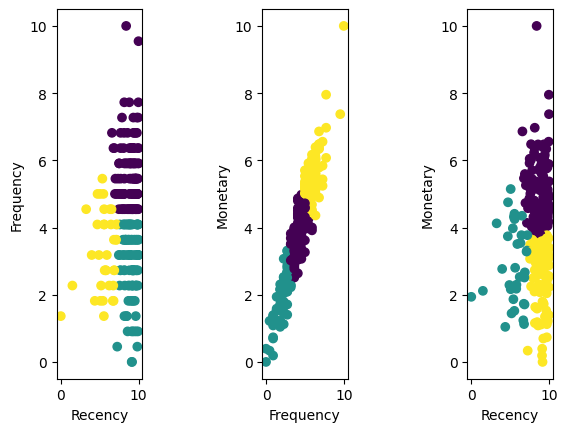

In [57]:
# Segregating data for Clustering
r_f = RFM[["Scaled_Recency","Scaled_Frequency"]]
f_m = RFM[["Scaled_Frequency","Scaled_Monetary"]]
r_m = RFM[["Scaled_Recency","Scaled_Monetary"]]

rfc = clf.fit(r_f)
r_f["labels"] = rfc.labels_

fmc = clf.fit(f_m)
f_m["labels"] = fmc.labels_

rmc = clf.fit(r_m)
r_m["labels"] = rmc.labels_

plt.subplot(1,5,1)
plt.scatter(x=r_f['Scaled_Recency'], y=r_f['Scaled_Frequency'], c=r_f['labels'])
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.subplot(1,5,3)
plt.scatter(x=f_m['Scaled_Frequency'], y=f_m['Scaled_Monetary'], c=f_m['labels'])
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.subplot(1,5,5)
plt.scatter(x=r_m['Scaled_Recency'], y=r_m['Scaled_Monetary'], c=r_m['labels'])
plt.xlabel("Recency")
plt.ylabel("Monetary")

Problem 3: Clusters 1 to 5 for Recency and Frequrncy Plot

In [58]:
for i in range(1,6):
  kmeans = KMeans(n_clusters = i, random_state=42, n_init=10)
  kmeans.fit(r_f[['Scaled_Recency','Scaled_Frequency']])
  r_f[f'Kmeans{i}'] = kmeans.labels_

r_f

<ipython-input-58-dfbf72ecd01f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-dfbf72ecd01f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-dfbf72ecd01f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-dfbf72e

,Scaled_Recency,Scaled_Frequency,labels,Kmeans1,Kmeans2,Kmeans3,Kmeans4,Kmeans5
Customer,,,,,,,,
1,7.159309,4.090909,2,0,0,2,1,0
2,9.619962,2.272727,1,0,0,1,0,1
3,3.973129,3.181818,2,0,0,2,3,2
4,8.848369,4.545455,0,0,1,0,1,4
5,4.372361,1.818182,2,0,0,2,3,2
...,...,...,...,...,...,...,...,...
252,8.403071,3.636364,1,0,0,1,1,0
253,9.458733,3.636364,1,0,0,1,1,4
254,9.036468,3.181818,1,0,0,1,0,1


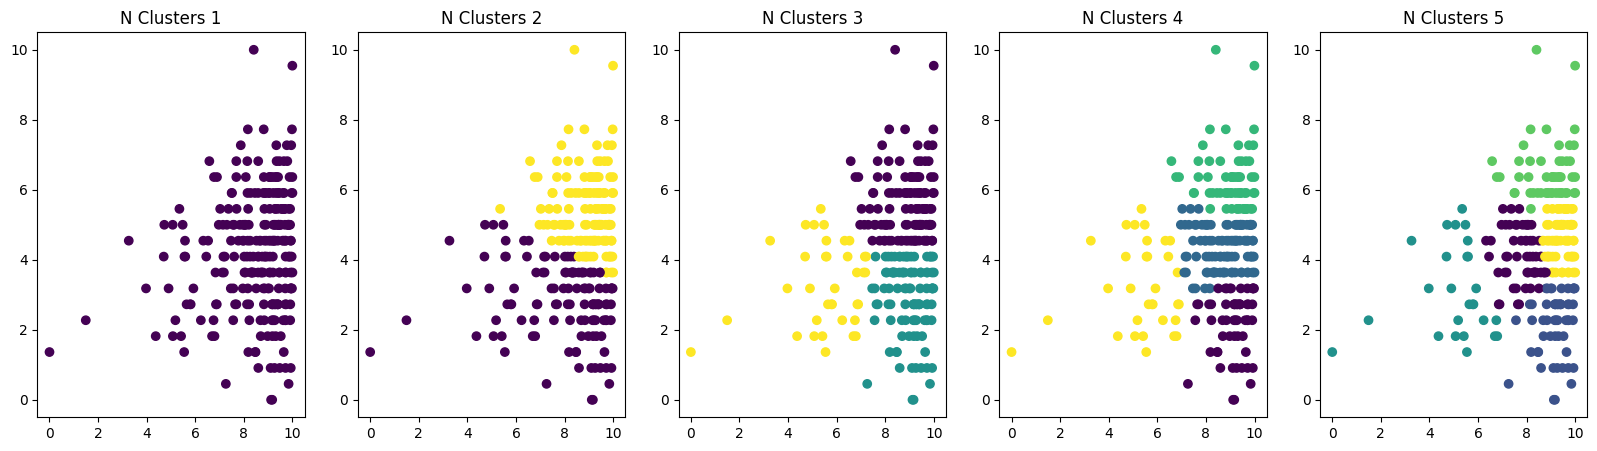

In [59]:
fig, ax = plt.subplots(nrows = 1, ncols=5, figsize=(20,5))

for k, ax in enumerate(fig.axes, start=1):
  ax.scatter(x=r_f['Scaled_Recency'], y=r_f['Scaled_Frequency'], c=r_f[f'Kmeans{k}'])
  ax.set_title(f'N Clusters {k}')

Elbow Plot for RFM Data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

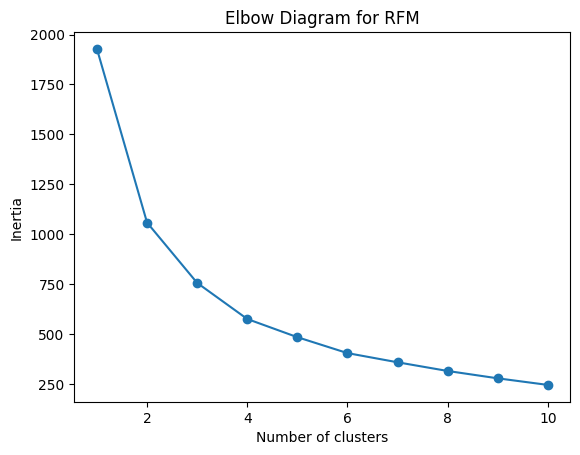

In [60]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(RFM[['Scaled_Recency','Scaled_Frequency','Scaled_Monetary']])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Diagram for RFM')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

This Elbow Plot shows that clusters can be formed from 3 as the delta of change is low after 4